# Copula Demo

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as ss

## Joint PDF (scatter plot) on original domain vs [0,1] domain

In [15]:
n_pts = 2000
rho = 0.9
Z2 = np.random.normal(size=(n_pts,2))
Z2[:,1] = Z2 @ np.array([rho, np.sqrt(1-rho**2)])

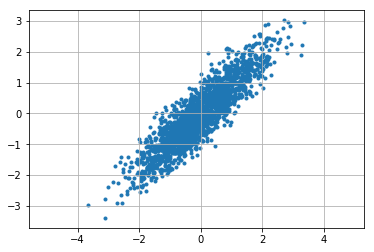

In [16]:
# Plot on the domain of normal distribution [-infty, infty]
plt.scatter(Z2[:,0], Z2[:,1],marker='.')
plt.grid()
plt.axis('equal')
plt.show()

In [17]:
Z2

array([[ 0.57680768,  0.76961025],
       [-0.56523142, -0.17655767],
       [-2.54320166, -1.80068562],
       ...,
       [-0.5915527 , -0.82091738],
       [-1.29259897, -0.32389513],
       [ 0.87041707,  0.76843028]])

In [18]:
U2 = ss.norm.cdf(Z2)
U2

array([[0.71796531, 0.77923444],
       [0.28595818, 0.42992792],
       [0.00549209, 0.03587622],
       ...,
       [0.27707508, 0.20584667],
       [0.0980749 , 0.37300872],
       [0.80796374, 0.7788842 ]])

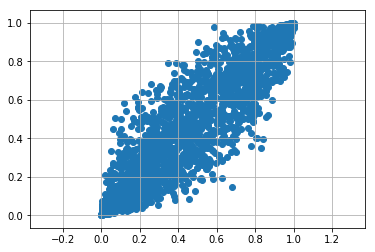

In [19]:
# Plot on the domain of uniform distribution [0,1]
plt.scatter(U2[:,0], U2[:,1])
plt.grid()
plt.axis('equal')
#plt.axis([0,1,0,1])
plt.show()

## Now apply the generated copula to some RVs
### 1. Two Pareto distributions

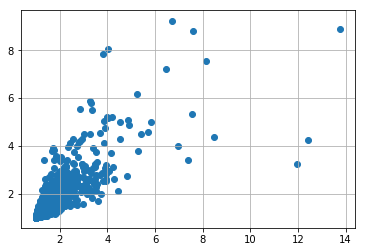

In [20]:
#Pareto distribution is given by
#  CDF = 1 - (lambda/x)^alpha
#     or
#  X = lambda * (1-U)^(-1/alpha)
lam = 1
alpha = 3

X2 = lam * np.power(1-U2, -1/alpha)

plt.scatter(X2[:,0], X2[:,1])
plt.grid()
#plt.axis('equal')
#plt.axis([0,1,0,1])
plt.show()

### 2. Pareto and Normal distributions  (two different distributions)

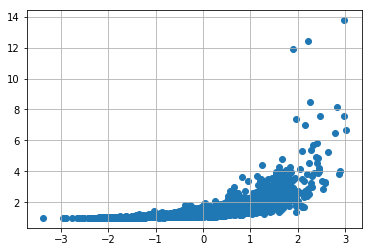

In [21]:
Y1 = ss.norm.ppf(U2[:,1])
Y2 = lam * np.power(1-U2[
    :,0], -1/alpha)

plt.scatter(Y1, Y2)
plt.grid()
#plt.axis('equal')
#plt.axis([0,1,0,1])
plt.show()

### 3. Two exponential distributions representing default time

In [22]:
# Now use the joint pair (U1, U2) pair to the default rate
lam = 1
default = -np.log(U2)/lam

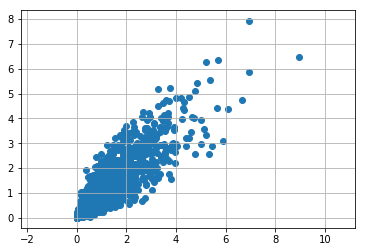

In [23]:
plt.scatter(default[:,0], default[:,1])
plt.grid()
plt.axis('equal')
plt.show()

### 4. Copula can be even applied to random samples
For some distributions, inverse CDF is difficult to compute. But, suppose that we can draw RNs easily.

In [24]:
X1 = ss.ncx2.rvs(5, 4, size=n_pts)
X2 = ss.ncx2.rvs(8, 3, size=n_pts)

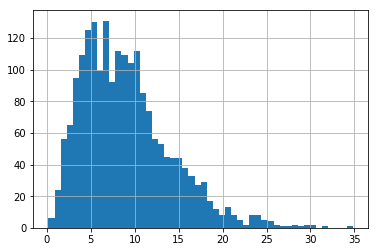

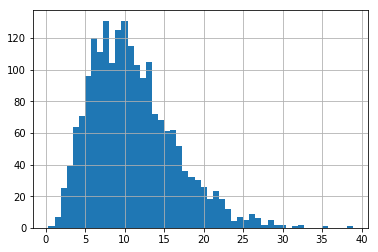

In [25]:
n, bins, patches = plt.hist(X1, 50)
plt.grid(True)
plt.show()
n, bins, patches = plt.hist(X2, 50)
plt.grid(True)
plt.show()

In [28]:
rank1 = np.int16(ss.rankdata(U2[:,0]) - 1)
rank2 = np.int16(ss.rankdata(U2[:,1]) - 1)
print(U2[:,0])
print(rank1)

[0.71796531 0.28595818 0.00549209 ... 0.27707508 0.0980749  0.80796374]
[1437  584   12 ...  564  203 1627]


In [29]:
X1

array([ 9.5765078 ,  6.41602365, 13.58943786, ..., 10.49421766,
        6.26582467,  9.27150669])

In [30]:

X1

array([ 0.17901971,  0.43917579,  0.59700411, ..., 30.3091944 ,
       31.87684447, 34.81340179])

In [31]:
X1.sort()
X1_rank = X1[np.int16(rank1)]
X2.sort()
X2_rank = X2[np.int16(rank2)]

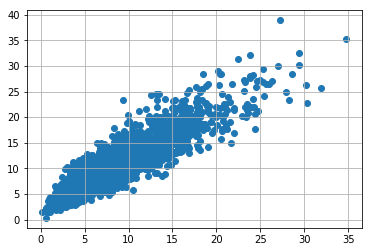

In [32]:
plt.scatter(X1_rank, X2_rank)
plt.grid()
#plt.axis('equal')
#plt.axis([0,1,0,1])
plt.show()

## We write a function generating multi-variate Gaussian copula

In [34]:
def CopulaGaussian(n_var=2, n_sample=1000, rho=0.0):
    corr_mat = np.eye(n_var)*(1.0-rho) + rho
    chol_mat = np.linalg.cholesky(corr_mat)
    Z = np.random.normal(size=(n_sample, n_var)) @ chol_mat.transpose()
    U = ss.norm.cdf(Z)
    return U

In [33]:
## Simple correlation matrix
n_var = 3
rho = 0.75
corr_mat = np.eye(n_var)*(1-rho) + rho
print(corr_mat)

[[1.   0.75 0.75]
 [0.75 1.   0.75]
 [0.75 0.75 1.  ]]


In [41]:
U2 = CopulaGaussian(n_var=2, rho=0.9)

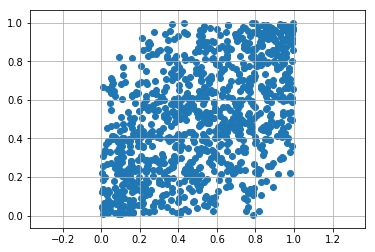

In [40]:
# Test the code
plt.scatter(U2[:,0], U2[:,1])
plt.axis('equal')
plt.grid()
plt.show()

# Simple CDO demo

##### * Assume that the individual loans have the default rate of $\lambda$=0.3 (30% of loans default every year)
* Let's package 10 (possibly sub-prime) loans into our CDO
* Create gaussian copula with rho = 0.5 vs 0.9
* Assume the maturity of our CDO is 1 year. 
* Assume the senior tranche is the bottom 50% of the loan (i.e. not affected by the first 50% loss)

In [49]:
# Gaussian copula 
lam = 0.3
n_sample = 10000
U2 = CopulaGaussian(n_var=10, n_sample=n_sample, rho=0.9)

# Generate RNs for the default time
default_time = -np.log(U2)/lam
print( np.round(default_time, decimals=2) )

[[1.55 2.59 3.85 ... 0.93 2.22 2.27]
 [6.19 5.06 8.67 ... 6.78 8.55 6.71]
 [0.87 1.23 0.78 ... 2.16 1.42 0.71]
 ...
 [0.87 0.53 0.75 ... 1.08 0.85 0.54]
 [1.33 3.71 4.13 ... 2.91 3.34 3.52]
 [2.51 3.14 2.61 ... 1.65 1.82 1.64]]


In [50]:
# Check that the average default time of the individual loans are around 3.33 years
print( np.mean(default_time, axis=0) )

[3.30416464 3.2961826  3.32331662 3.31087123 3.31268511 3.33616365
 3.29725709 3.29921663 3.31553555 3.30782052]


In [51]:
# Compute the default ratio for the individual loans within 1 year
# it should be about 20%. Exactly 1-exp(-0.2)
print( "Exact default rate < 1yr:", 1 - np.exp(-lam) )
print( np.mean(default_time < 1.0, axis=0) )

Exact default rate < 1yr: 0.2591817793182821
[0.2599 0.2564 0.2536 0.2546 0.2556 0.2555 0.2532 0.2583 0.2586 0.254 ]


In [52]:
# Expected of individual loan
(1 - np.sum(default_time < 1.0, axis=0) / n_sample)*100

array([74.01, 74.36, 74.64, 74.54, 74.44, 74.45, 74.68, 74.17, 74.14,
       74.6 ])

In [53]:
# Count the total defaults in the pool within 1 year
default_total_loan = np.sum(default_time < 1.0, axis=1)
print( default_total_loan )

[1 0 4 ... 8 0 0]


In [54]:
# Compute the percentage of the total default bigger than 5
# This is the probability of the senior tranche having any loss
np.mean(default_total_loan > 5)

0.232

In [55]:
# We can also compute the expected price of senior tranche (out of 100)
np.mean(np.fmin(10 - default_total_loan, 5))/5.0 * 100

82.202

## When the correlation is high, the default rate of the senior tranche CDO is just as bad as the individual loans (sub-prime)